# Business Understanding

## General Information of the Location
[King County Infos](https://de.wikipedia.org/wiki/King_County_(Washington))

- County of US-Department in Washington

- Inhabitants: 1.9 Million 

- Population Density: 350,7 inh/$k^2$

- County Seat/Capital: Seattle

- Where are we:
![Map of King County](figures/Map_King_County.png)

Good to know:

- 2 Main Areas: Seattle (Capital) + Landside
![Area](figures/king_county.png)

- Waterside vs. no waterside 
Infrastructure: 
- good connection in Seattle Area (many roads)
- bad connection in rural Area (few roads)
- USA means: Transport is by car mainly, roads are most important

- Seattle is only big city in sorrounding by approx. 200 km in all directions

### Location of Seattle City Center

- Latitude = 47.6
- Longitude = - 122.3

## Business Understanding

To get an idea about the business we are looking at, we can use questions related to house sales.

**General Information regarding the area:**
- Location (Neighbourhood)
- Years of building in the neighbourhood
- House conditions in the neighborhood
- Infrastructure (roads, public transport, parking lots)
- Sorroundings (Doctors, Restaurants, Entertainment)
- Emptines of Houses?

**House specific:**
- Condition of the house (How old? Renovation? Last renovation?)
- Area of property (plot size)
- Price per area (property area)
- Price per living area (tearraces?, rooms?)
- House Offers vs. Market demand
- Resales? What are the prices for it.
- How many houses were sold and what was the price?
- Comparison with older prices? (in a specific area)
- Development of the area?

**Market:**
- How many houses were sold in this time span?
- Is this a lot?
- What is the economic situation during the sales timespan?
- Which timespan are we looking at?

### Stakeholder Information (opposie things):

Recommendations for **buyers**:
- Good house for a fair price
- Not much to renovate (if I dont want to)
- Cheaper house with renovation work to do
- Do I need to live central (work) or in a remote place?

Recommendations for **sellers**:
- Get a good price for the house
- Make profit with the sale? (including costs related to the sell)
- Dont want to put a lot of effort in selling (easy to sell house)

What is a good recommendation for buying? 

### Basic Questions
What kind of real estate are we looking at? 

Where is King County?

Who are the typical buyers and sellers?

If we found the good houses for buyers, these are not the right houses for sellers

# Data Mining

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from scipy import stats

%matplotlib inline

In [7]:
filename = 'King_County_House_prices_dataset.csv'
delimiter = ','

df_houses = pd.read_csv("rawdata/"+filename,delimiter=delimiter)
columns = pd.re
# dataframe
df_houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [24]:
df_houses.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [27]:
# Column Names and descriptions for Kings County Data Set as a dictionary
columns_dict = {
'id': 'unique identified for a house',
'dateDate': 'house was sold',
'pricePrice':  'is prediction target',
'bedroomsNumber': 'of Bedrooms/House',
'bathroomsNumber': 'of bathrooms/bedrooms',
'sqft_livingsquare': 'footage of the home',
'sqft_lotsquare': 'footage of the lot',
'floorsTotal': 'floors (levels) in house',
'waterfront': 'House which has a view to a waterfront',
'view': 'Has been viewed',
'condition': 'How good the condition is ( Overall )',
'grade': 'overall grade given to the housing unit, based on King County grading system',
'sqft_above': 'square footage of house apart from basement',
'sqft_basement': 'square footage of the basement',
'yr_built': 'Built Year',
'yr_renovated': 'Year when house was renovated',
'zipcode': 'zip',
'lat': 'Latitude coordinate',
'long': 'Longitude coordinate',
'sqft_living15': 'The square footage of interior housing living space for the nearest 15 neighbors',
'sqft_lot15': 'The square footage of the land lots of the nearest 15 neighbors'
}
print(columns_dict)

{'id': 'unique identified for a house', 'dateDate': 'house was sold', 'pricePrice': 'is prediction target', 'bedroomsNumber': 'of Bedrooms/House', 'bathroomsNumber': 'of bathrooms/bedrooms', 'sqft_livingsquare': 'footage of the home', 'sqft_lotsquare': 'footage of the lot', 'floorsTotal': 'floors (levels) in house', 'waterfront': 'House which has a view to a waterfront', 'view': 'Has been viewed', 'condition': 'How good the condition is ( Overall )', 'grade': 'overall grade given to the housing unit, based on King County grading system', 'sqft_above': 'square footage of house apart from basement', 'sqft_basement': 'square footage of the basement', 'yr_built': 'Built Year', 'yr_renovated': 'Year when house was renovated', 'zipcode': 'zip', 'lat': 'Latitude coordinate', 'long': 'Longitude coordinate', 'sqft_living15': 'The square footage of interior housing living space for the nearest 15 neighbors', 'sqft_lot15': 'The square footage of the land lots of the nearest 15 neighbors'}


In [28]:
df_houses.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
892,3298700946,7/25/2014,340000.0,2,1.00,1090,6771,1.0,0.0,0.0,...,6,1090,0.0,1954,NaN,98106,47.5185,-122.352,1200,4992
12752,7663700968,5/28/2014,565000.0,7,4.50,4140,9066,1.0,0.0,0.0,...,7,2070,2070.0,1978,NaN,98125,47.7302,-122.291,1440,1865
6302,4232400470,5/27/2014,751750.0,2,2.00,1880,5400,1.5,0.0,0.0,...,8,1880,0.0,1902,0.0,98112,47.6238,-122.311,1590,5400
2689,3820350070,9/29/2014,349950.0,4,2.50,1820,3134,2.0,0.0,0.0,...,7,1820,0.0,1999,0.0,98019,47.7351,-121.985,1820,3751
19969,2781280300,10/16/2014,249900.0,3,2.50,1610,3517,2.0,0.0,0.0,...,8,1610,0.0,2005,0.0,98055,47.4496,-122.189,1830,2889
10346,7461400400,11/3/2014,334000.0,5,1.75,2590,6720,1.0,0.0,0.0,...,7,1750,840.0,1979,0.0,98055,47.4350,-122.192,1820,7521
14429,7452500815,3/10/2015,212625.0,2,1.00,960,5000,1.0,0.0,0.0,...,6,960,0.0,1951,NaN,98126,47.5188,-122.372,930,5000
10758,795000765,6/16/2014,92000.0,2,1.00,760,5500,1.5,NaN,0.0,...,5,760,0.0,1947,NaN,98168,47.5045,-122.329,1040,5515
15886,1193000280,5/27/2014,994000.0,3,2.25,2510,6339,1.5,0.0,2.0,...,8,1810,700.0,1932,0.0,98199,47.6496,-122.391,1820,5741
8414,8151600142,5/12/2015,319950.0,5,1.75,1710,11900,1.0,0.0,0.0,...,7,1070,640.0,1958,0.0,98146,47.5060,-122.365,1030,10360


In [9]:
#total size
df_houses.size

453537

In [29]:
df_houses.shape

(21597, 21)

# Data Cleaning

Check for the data type and the number of missing values:

In [30]:
df_houses.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639


See the basic statistics before cleaning:

In [72]:
df_houses.describe().round(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,19221.00,21597.00,21597.00,21597.00,21597.00,21597.00,17755.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,4.580474e+09,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,0.23,3.41,7.66,1788.60,1971.00,83.64,98077.95,47.56,-122.21,1986.62,12758.28
std,2.876736e+09,367368.14,0.93,0.77,918.11,41412.64,0.54,0.09,0.76,0.65,1.17,827.76,29.38,399.95,53.51,0.14,0.14,685.23,27274.44
min,1.000102e+06,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2.123049e+09,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3.904930e+09,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7.308900e+09,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,0.00,4.00,8.00,2210.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9.900000e+09,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00


In [12]:
df_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


We have 3 columns out 21 with missing values. 

We have 2 object data types out of 21 columns:
- date
- sqft_basement

See how many values are missing:

In [38]:
missing_data = pd.DataFrame(df_houses.isnull().sum(),columns=['Count'])
missing_data['Percentage'] = round(missing_data.Count/df_houses.shape[0]*100,1)
missing_data[missing_data.Count!=0]

,Count,Percentage
waterfront,2376,11.0
view,63,0.3
yr_renovated,3842,17.8


The values of missing views are relatively low, we could set the missing values to 0. Since most of the houses has not been viewed.

## Clean variable 'view'

In [68]:
df_houses.view = df_houses.view.fillna(0.0)

Get updated basic statistics:

In [71]:
df_houses.describe().round(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,19221.00,21597.00,21597.00,21597.00,21597.00,21597.00,17755.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,4.580474e+09,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,0.23,3.41,7.66,1788.60,1971.00,83.64,98077.95,47.56,-122.21,1986.62,12758.28
std,2.876736e+09,367368.14,0.93,0.77,918.11,41412.64,0.54,0.09,0.76,0.65,1.17,827.76,29.38,399.95,53.51,0.14,0.14,685.23,27274.44
min,1.000102e+06,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2.123049e+09,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3.904930e+09,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7.308900e+09,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,0.00,4.00,8.00,2210.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9.900000e+09,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00


REMARKS:
- condition is from 1 to 5
- year renovated has strange numbers
- sqft basement is missing
- year renovated has values zero or maximum 2015

## Clean variable 'sqft_basement'

For the sqft basement variable, there are no missing values but the type of the series 
is an object.

In [75]:
df_houses.sqft_basement.nunique()

304

In [80]:
df_houses.groupby('sqft_basement').sqft_basement.count()

sqft_basement
0.0       12826
10.0          2
100.0        42
1000.0      148
1008.0        1
1010.0       63
1020.0       51
1024.0        1
1030.0       44
1040.0       55
1050.0       41
1060.0       58
1070.0       51
1080.0       32
1090.0       32
110.0        18
1100.0       78
1110.0       35
1120.0       43
1130.0       30
1135.0        1
1140.0       28
1150.0       27
1160.0       26
1170.0       30
1180.0       28
1190.0       24
120.0        53
1200.0       69
1210.0       18
          ...  
80.0         20
800.0       201
810.0        55
820.0        62
830.0        56
840.0        83
850.0        72
860.0        79
861.0         1
862.0         1
870.0        48
875.0         1
880.0        69
890.0        52
90.0         21
900.0       142
906.0         1
910.0        71
915.0         1
920.0        66
930.0        41
935.0         1
940.0        71
946.0         1
950.0        62
960.0        65
970.0        44
980.0        57
990.0        52
?           454
Name: sqft

In [88]:
print('Number of sqft_basement values that have a ? :',len(df_houses.sqft_basement[df_houses.sqft_basement == '?']) / df_houses.shape[0])

Number of sqft_basement values that have a ? : 0.021021438162707785


Since a basement is not the most important parameter of a house we just set the ? values with 0, since more than half of the numbers are zeros (12826).

In [95]:
df_houses.sqft_basement.replace(to_replace='?', value=0.0)

0           0.0
1         400.0
2           0.0
3         910.0
4           0.0
5        1530.0
6             0
7           0.0
8         730.0
9           0.0
10       1700.0
11        300.0
12          0.0
13          0.0
14          0.0
15        970.0
16          0.0
17          0.0
18            0
19          0.0
20        760.0
21        720.0
22          0.0
23          0.0
24          0.0
25          0.0
26        700.0
27          0.0
28        730.0
29          0.0
          ...  
21567       0.0
21568     320.0
21569       0.0
21570       0.0
21571       0.0
21572     190.0
21573       0.0
21574    1800.0
21575       0.0
21576       0.0
21577       0.0
21578       0.0
21579      50.0
21580       0.0
21581         0
21582       0.0
21583       0.0
21584       0.0
21585       0.0
21586       0.0
21587       0.0
21588       0.0
21589       0.0
21590     910.0
21591     130.0
21592       0.0
21593       0.0
21594       0.0
21595       0.0
21596       0.0
Name: sqft_basement, Len

In [102]:
#df_houses.sqft_basement.astype('float64',copy=False)
df_houses.sqft_basement = pd.to_numeric(df_houses.sqft_basement)

See the new statistics:

In [103]:
df_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(9), int64(11), object(1)
memory usage: 3.5+ MB


In [104]:
df_houses.describe().round(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,19221.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,17755.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,4.580474e+09,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,0.23,3.41,7.66,1788.60,285.72,1971.00,83.64,98077.95,47.56,-122.21,1986.62,12758.28
std,2.876736e+09,367368.14,0.93,0.77,918.11,41412.64,0.54,0.09,0.76,0.65,1.17,827.76,439.82,29.38,399.95,53.51,0.14,0.14,685.23,27274.44
min,1.000102e+06,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2.123049e+09,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3.904930e+09,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7.308900e+09,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,0.00,4.00,8.00,2210.00,550.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9.900000e+09,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00


### Set new relation between sqft_basement and sqft_living 

sqft_basement = sqft_living - sqft_above

## Clean variable waterfront

In [108]:
df_houses.groupby('waterfront').waterfront.count()

waterfront
0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [114]:
df_houses.waterfront.value_counts(dropna=False)

 0.0    19075
NaN      2376
 1.0      146
Name: waterfront, dtype: int64

There are 11 percent values of waterfront with NaN, the statistic shows more than 75 % dont have a waterfront, therefore here the values here are set to 0 (no waterfront)

In [117]:
df_houses.waterfront = df_houses.waterfront.fillna(0)

In [118]:
df_houses.waterfront.value_counts(dropna=False)

0.0    21451
1.0      146
Name: waterfront, dtype: int64

In [119]:
df_houses.describe().round(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,17755.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,4.580474e+09,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,0.23,3.41,7.66,1788.60,285.72,1971.00,83.64,98077.95,47.56,-122.21,1986.62,12758.28
std,2.876736e+09,367368.14,0.93,0.77,918.11,41412.64,0.54,0.08,0.76,0.65,1.17,827.76,439.82,29.38,399.95,53.51,0.14,0.14,685.23,27274.44
min,1.000102e+06,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2.123049e+09,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3.904930e+09,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7.308900e+09,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,0.00,4.00,8.00,2210.00,550.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9.900000e+09,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00


## Clean variable 'yr_renovated'

In [120]:
df_houses.yr_renovated.value_counts(dropna=False)

 0.0       17011
NaN         3842
 2014.0       73
 2003.0       31
 2013.0       31
 2007.0       30
 2005.0       29
 2000.0       29
 1990.0       22
 2004.0       22
 2009.0       21
 1989.0       20
 2006.0       20
 2002.0       17
 1991.0       16
 1998.0       16
 1984.0       16
 1999.0       15
 2001.0       15
 2008.0       15
 2010.0       15
 1983.0       15
 2015.0       14
 1986.0       14
 1987.0       14
 1994.0       14
 1985.0       14
 1992.0       13
 1995.0       12
 1997.0       12
           ...  
 1964.0        5
 1975.0        5
 1973.0        4
 1981.0        4
 1963.0        4
 1969.0        4
 1965.0        4
 1972.0        3
 1956.0        3
 1945.0        3
 1960.0        3
 1978.0        3
 1958.0        3
 1955.0        3
 1974.0        2
 1962.0        2
 1967.0        2
 1940.0        2
 1957.0        2
 1946.0        1
 1959.0        1
 1951.0        1
 1954.0        1
 1950.0        1
 1971.0        1
 1944.0        1
 1948.0        1
 1976.0       

Since renovation itself and in particular if a house was renovated at what time is an important measure for the price, we set the yr_renovated value to zero, since 17011 out of 21597 houses have not been renovated. The median value of the remaining data is also 0, therefore 0 is a good assumption since if the house has been renovated, the number is quite high (e.g. a year from 1953 to 2014), therefore the meadian of 0 is a good assumption. 

In [132]:
df_houses.yr_renovated = df_houses.yr_renovated.fillna(0)

In [133]:
df_houses.describe().round(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,4.580474e+09,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,0.23,3.41,7.66,1788.60,285.72,1971.00,68.76,98077.95,47.56,-122.21,1986.62,12758.28
std,2.876736e+09,367368.14,0.93,0.77,918.11,41412.64,0.54,0.08,0.76,0.65,1.17,827.76,439.82,29.38,364.04,53.51,0.14,0.14,685.23,27274.44
min,1.000102e+06,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2.123049e+09,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3.904930e+09,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7.308900e+09,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,0.00,4.00,8.00,2210.00,550.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9.900000e+09,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00


## Convert 'date' to usable format

The date format was object but should be converted to a date format, here we use the pandas to_datetime method.

In [121]:
df_houses.date = pd.to_datetime(df_houses.date)

In [134]:
df_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(11)
memory usage: 3.5

In [130]:
print('The timespan of sales we are looking at is from',df_houses.date.min(),'to',df_houses.date.max())
#df_houses.sort_values('date')

The timespan of sales we are looking at is from 2014-05-02 00:00:00 to 2015-05-27 00:00:00


## Identify categorical and numerical values

In [135]:
df_houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


- the column id is kind of a categorical data, and can be dropped for the first analysis of our basic data set. Later on.

Categorical variables:
- id
- bedrooms
- bathrooms
- floors
- waterfront
- view
- condition 
- grade
- yr_renovated (untill now)

In [176]:
categorical_variables = ['id','bedrooms','bathrooms','floors','waterfront','view','condition','grade','yr_renovated']

But the categorical variables are all in a numeric format (e.g. 0 or 1, 1 to 3 etc.)

## Problematic columns

yr_renovation has either 0 = no renovation or a year of renovation. This should be included in a new feature: 

- condition of the house = timespan from last renovation to date of sale.
- or if no renovation have been done = timespan from year build to date of sale 

For this feature we use years to simplify

## Plausibility Check

In [155]:
df_houses.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10925,7349620030,2014-07-22,272000.0,4,2.25,2115,6234,2.0,0.0,0.0,...,7,2115,0.0,1998,0.0,98002,47.2850,-122.201,2440,6366
6063,7016000440,2014-07-16,525000.0,5,2.25,2500,8621,1.5,0.0,0.0,...,7,2500,0.0,1968,0.0,98034,47.7379,-122.185,1980,7395
3424,7732400490,2014-11-05,732350.0,4,2.50,2270,7665,2.0,0.0,0.0,...,9,2270,0.0,1986,0.0,98052,47.6612,-122.148,2450,8706
25,1202000200,2014-11-03,233000.0,3,2.00,1710,4697,1.5,0.0,0.0,...,6,1710,0.0,1941,0.0,98002,47.3048,-122.218,1030,4705
20173,745500010,2014-12-08,730000.0,4,2.75,3800,9606,2.0,0.0,0.0,...,9,3800,0.0,2008,0.0,98011,47.7368,-122.208,3400,9677
10698,8564700240,2014-10-17,575000.0,3,2.50,2610,7301,2.0,0.0,0.0,...,8,2610,0.0,2004,0.0,98072,47.7614,-122.139,2460,7181
5578,5127000420,2015-02-23,357500.0,3,1.50,1540,11858,1.0,0.0,0.0,...,7,1540,0.0,1966,0.0,98059,47.4755,-122.157,1550,11473
14104,2473530150,2015-03-23,412950.0,4,2.50,2430,6796,2.0,0.0,0.0,...,8,2430,0.0,1993,0.0,98058,47.4499,-122.127,2450,8400
17134,8732160250,2015-01-20,204250.0,3,2.25,1960,7708,1.0,0.0,0.0,...,7,1490,470.0,1984,0.0,98023,47.2981,-122.374,1580,8063
1797,5312100060,2014-11-11,465000.0,4,2.50,2200,3141,2.0,0.0,0.0,...,7,2060,140.0,1994,0.0,98144,47.5726,-122.305,1660,3175


In [ ]:
#df_houses.sqft_living + df_houses.sqft

# Data Exploration (most important)

In [138]:
df_explore = df_houses
df_explore.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Finding: sqft_living + sqft_basement = sqft_above (Keller + Geschosse) = Gesamtfläche

## Correlation Coefficients

In [ ]:
# select variables to plot in

In [178]:
continuous_var = list(df_explore.select_dtypes(['int64','float64','datetime64[ns]']).columns.values)
for ivar in categorical_variables:
    continuous_var.remove(ivar)
continuous_var

['date',
 'price',
 'sqft_living',
 'sqft_lot',
 'waterfront',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'price_per_living_sqft']

Text(0.5, 1.0, 'Correlation coefficients for King County Housing data set in %')

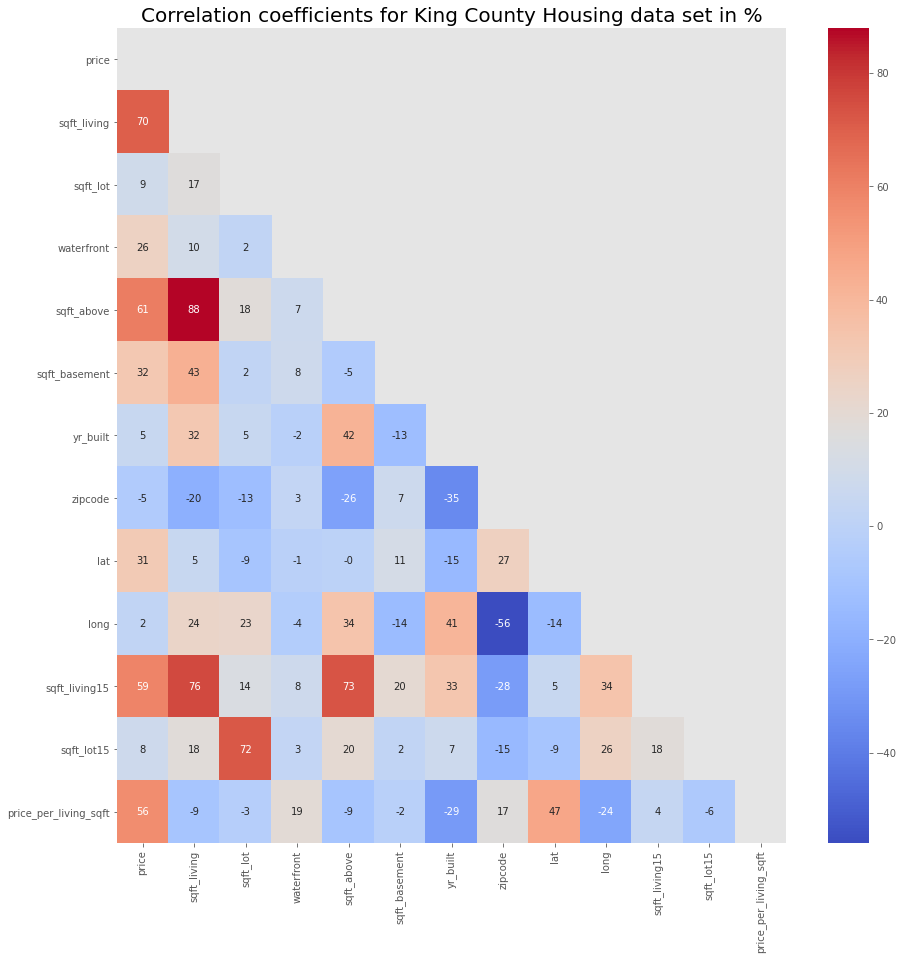

In [179]:
df_explore_dum=pd.get_dummies(df_explore[continuous_var].copy())
mask = np.triu(df_explore_dum.corr())

fig, ax = plt.subplots(figsize=(15,15))  

sns.heatmap(round(df_explore_dum.corr()*100,0)
                 ,annot=True
                 ,mask=mask
                 ,cmap='coolwarm'
                 ,ax=ax
                 ,fmt='g')
#ax.set_ylim((0,15))
#ax.set_xlim((0,15))
plt.title('Correlation coefficients for King County Housing data set in %',size=20)
#plt.savefig('./figures/housing_correlogram.png')
#plt.savefig('./figures/housing_correlogram.pdf')

Key Findings of the heatmap:

**1. Price**

- sqft_living (0.7)
- grade (0.67)
- sqft_above (0.6)
- lat (Breitengrad)
- sqft_living_15

## Grafical Checks

In [160]:
from pandas.plotting import scatter_matrix
import matplotlib
matplotlib.style.use('ggplot')

#scatter_matrix(df_explore[["price", "sqft_living"]],diagonal='hist');
#scatter_matrix(df_explore)

Text(0, 0.5, 'price')

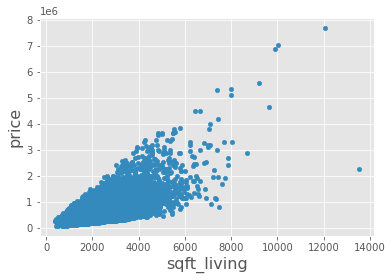

In [161]:
df_explore.plot(kind='scatter',x='sqft_living',y='price');
plt.xlabel('sqft_living',size=16)
plt.ylabel('price',size=16)

Linear dependency but with very large scatter.

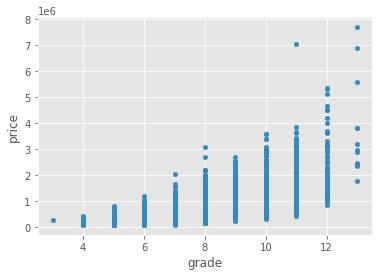

In [162]:
df_explore.plot(kind='scatter',x='grade',y='price');

Linear dependency but with very large scatter, the price should be related to the size of the house.

<AxesSubplot:xlabel='lat', ylabel='price'>

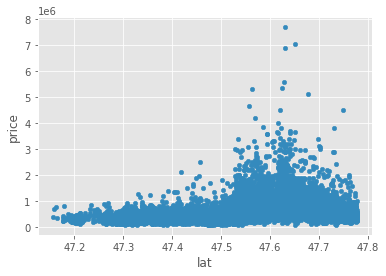

In [163]:
df_explore.plot(kind='scatter',x='lat',y='price')

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

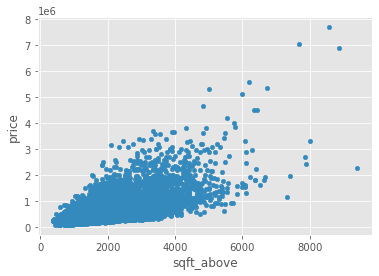

In [164]:
df_explore.plot(kind='scatter',x='sqft_above',y='price')

<AxesSubplot:xlabel='sqft_living15', ylabel='price'>

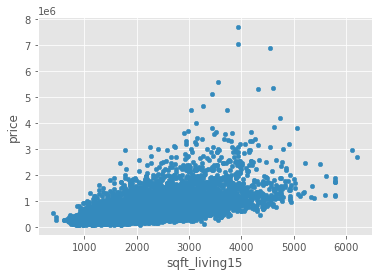

In [166]:
df_explore.plot(kind='scatter',x='sqft_living15',y='price')

## Create relative prices

In [168]:
df_explore['price_per_living_sqft'] = df_explore.price / df_explore.sqft_living
df_explore.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_living_sqft
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,188.050847
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,209.338521
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,233.766234
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,308.163265
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,303.571429


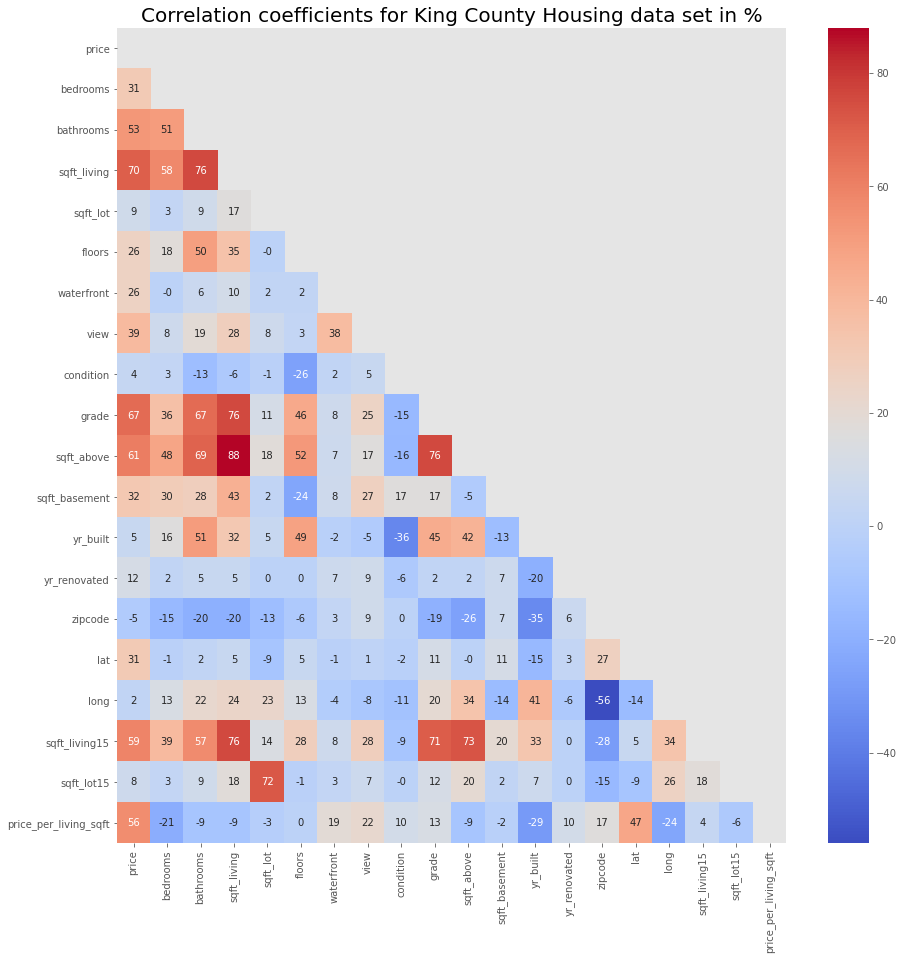

In [174]:
continuous_var = list(df_explore.select_dtypes(['int64','float64','datetime64[ns]']).columns.values)
continuous_var.remove('id')

df_explore_dum=pd.get_dummies(df_explore[continuous_var].copy())
mask = np.triu(df_explore_dum.corr())

fig, ax = plt.subplots(figsize=(15,15))  

sns.heatmap(round(df_explore_dum.corr()*100,0)
                 ,annot=True
                 ,mask=mask
                 ,cmap='coolwarm'
                 ,ax=ax
                 ,fmt='g')
#ax.set_ylim((0,15))
#ax.set_xlim((0,15))
plt.title('Correlation coefficients for King County Housing data set in %',size=20)
plt.savefig('./figures/housing_correlogram_rel_prices.png')
plt.savefig('./figures/housing_correlogram_rel_prices.pdf')

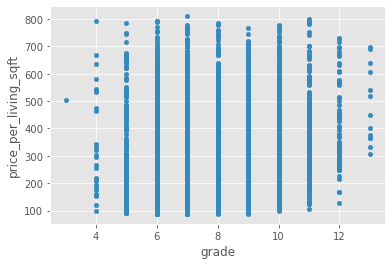

In [169]:
df_explore.plot(kind='scatter',x='grade',y='price_per_living_sqft');

The given grade is not a good measure for the relative price.

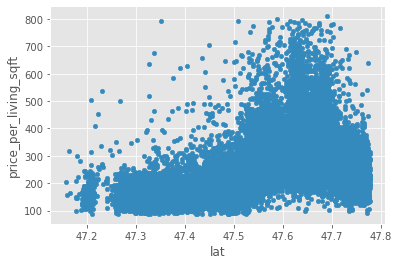

In [171]:
df_explore.plot(kind='scatter',x='lat',y='price_per_living_sqft');

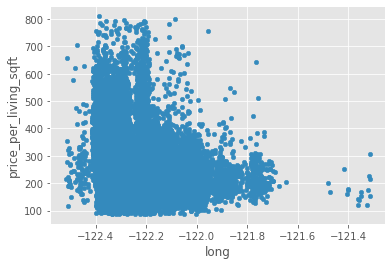

In [172]:
df_explore.plot(kind='scatter',x='long',y='price_per_living_sqft');

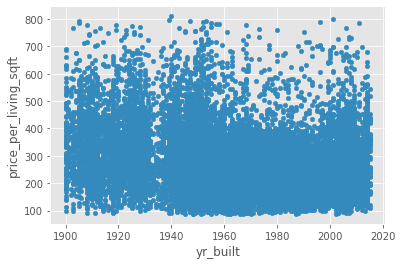

In [175]:
df_explore.plot(kind='scatter',x='yr_built',y='price_per_living_sqft');

buyer recommendation: what to explore?

seller recommendations: what to explore?

Which images can be used?

## Visualization

Visualization for categorical variables:

Scatter:

In [180]:
#fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,3))

#for xcol, ax in zip([ 'cylinders', 'model year', 'origin'], axes):
#    data.plot(kind='scatter', x=xcol, y='mpg', ax=ax, alpha=0.4, color='b')

Histogramm:

In [181]:
#import warnings
#warnings.filterwarnings('ignore')
#fig = plt.figure(figsize = (8,8))
#ax = fig.gca()
#data.hist(ax = ax);

In [144]:
#fig = px.scatter(df, x="long", y="lat", 
#                 color="price", 
#                 hover_data=['price'],
#                 title="Price / Location Indication")
#fig.show()
#documentation: https://plotly.com/python/reference/densitymapbox/
#import plotly.express as px
#fig = px.density_mapbox(df, lat='lat', lon='long', z='price', radius=4,
#                        center=dict(lat=47.5, lon=-122.2), zoom=8.5, opacity=1, 
#                        mapbox_style="open-street-map")
#fig.show()

# Feature Engineering

# Predictive Modelling


## linear regression with one parameter

## linear regression with more parameter

mutlivariate 0.7 < R < 0.9

# Visualization (for the Presentation)

Project Finishing